## Heart Attack Risk Prediction Research

## Main goals of this project:
* Build and evaluate the best algorithm for heart attack risk prediction
* Apply Auto ML tool from Eval ML to automate model building
* Compare results of custom models and Auto ML

## Data
Link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

### About this dataset
- Age : Age of the patient
  
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
<br><br>
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
<br><br>
- thalach : maximum heart rate achieved
- target : 0= less chance of heart attack 1= more chance of heart attack


## Data Analysis

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df= pd.read_csv("heart.csv")
#df= df.drop(['oldpeak','slp','thall'],axis=1)
display(df.head())
shape = df.shape
print(f"df shape is: {shape}")

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


df shape is: (303, 14)


In [3]:
#Check nulls
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Correlations 

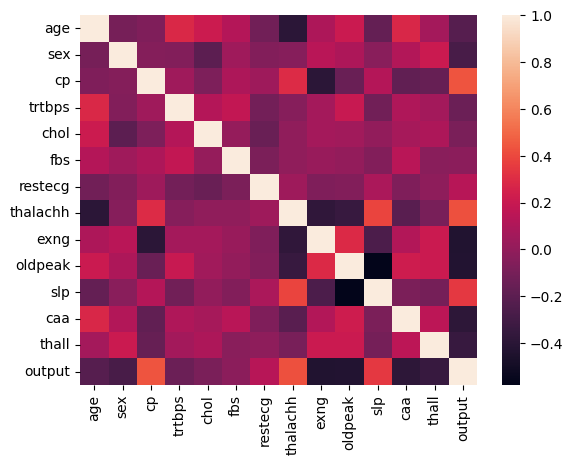

In [4]:
# Check correlations 
sns.heatmap(df.corr());

As we can see our variables are not highly correlated to each other 

#### Age distribution

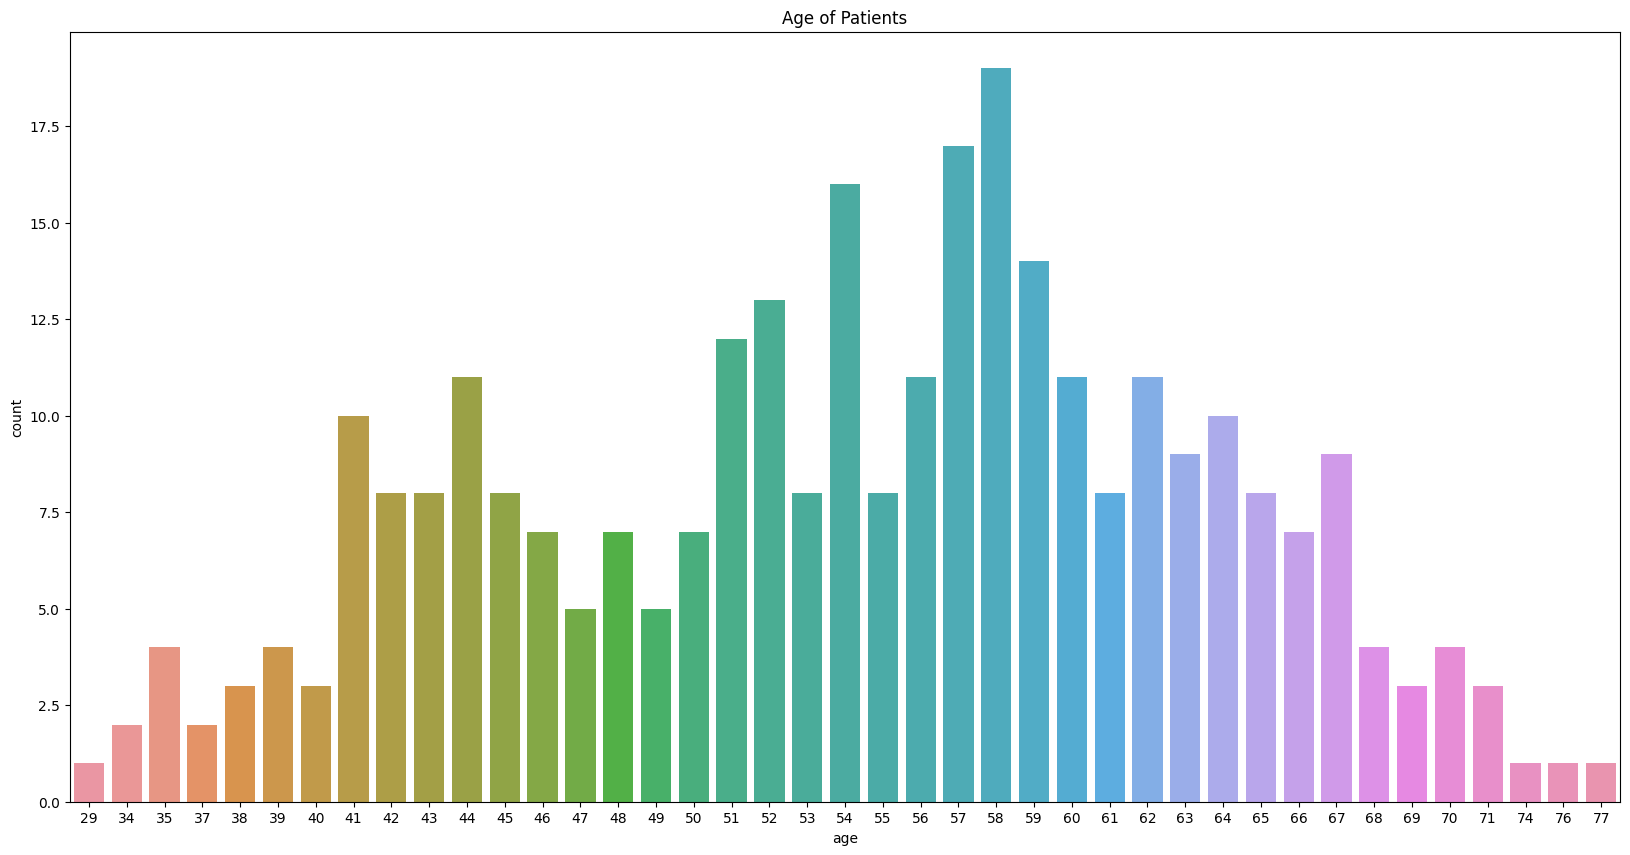

In [5]:
plt.figure(figsize=(20, 10))
plt.title("Age of Patients")
plt.xlabel("Age")
sns.countplot(x='age',data=df);

As we can see the Patients are of Age Group 51-67years in majority

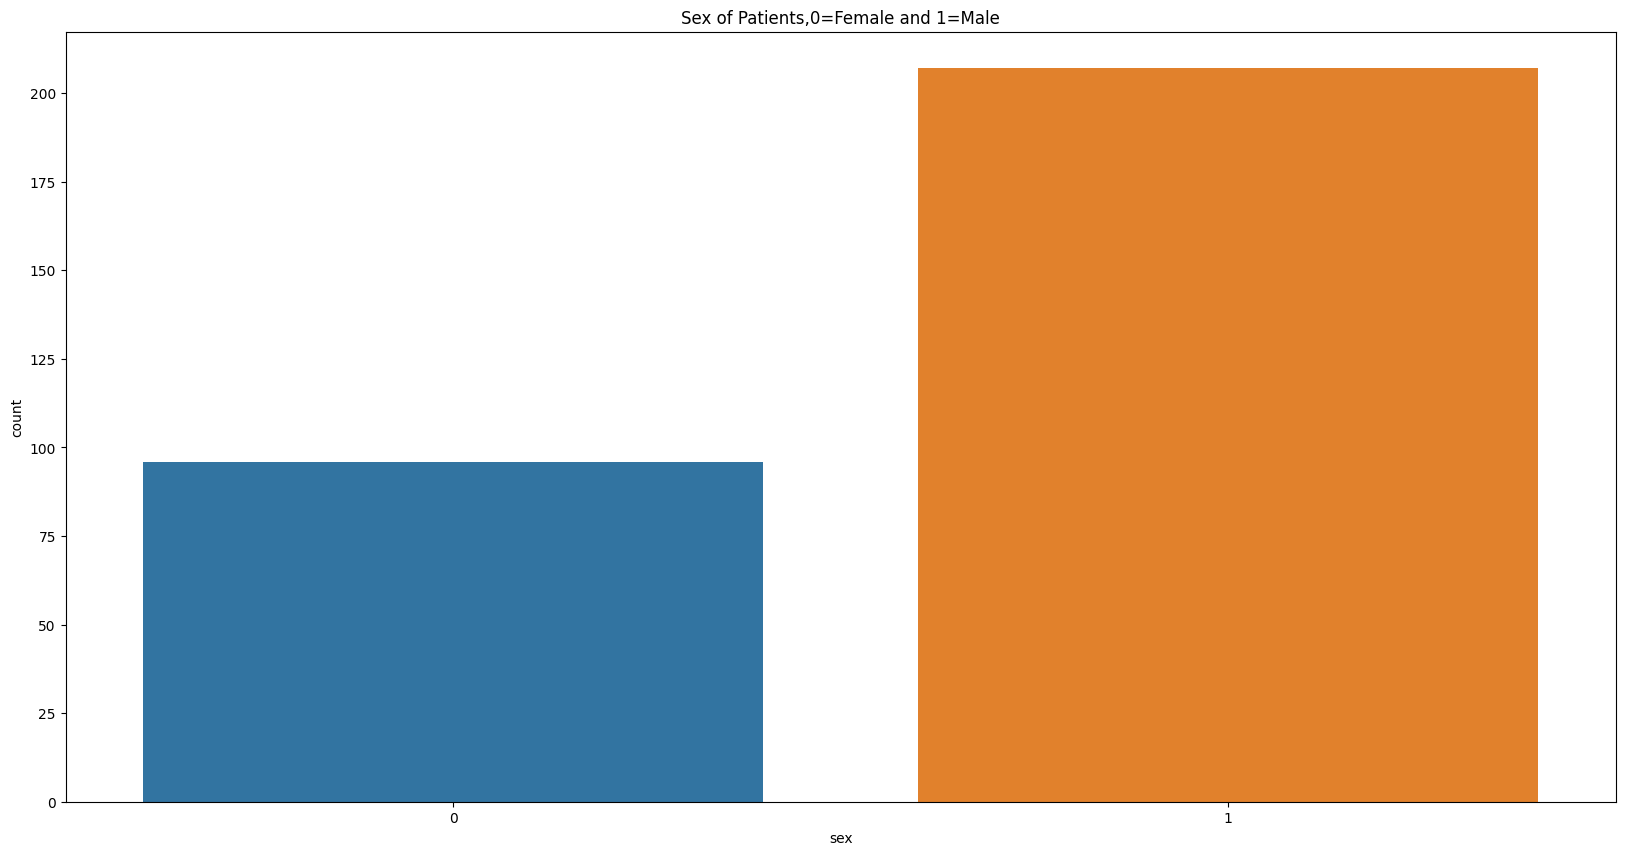

In [6]:
plt.figure(figsize=(20, 10))
plt.title("Sex of Patients,0=Female and 1=Male")

sns.countplot(x='sex',data=df);

#### Types of pain

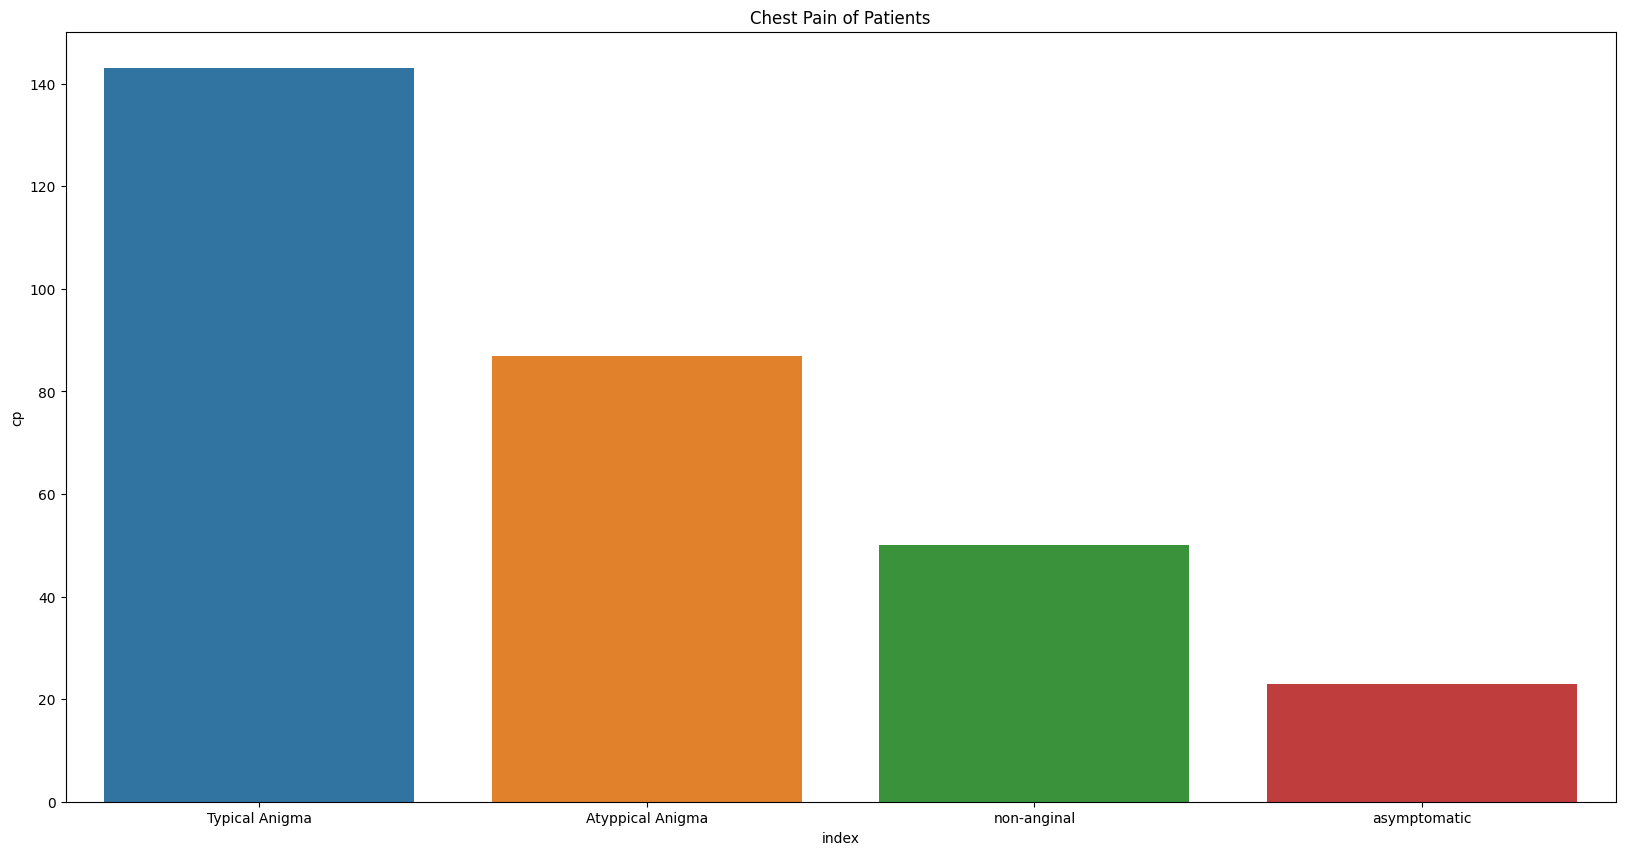

In [7]:
cp_data= df['cp'].value_counts().reset_index()
cp_data['index'][3]= 'asymptomatic'
cp_data['index'][2]= 'non-anginal'
cp_data['index'][1]= 'Atyppical Anigma'
cp_data['index'][0]= 'Typical Anigma'

plt.figure(figsize=(20, 10))
plt.title("Chest Pain of Patients")

sns.barplot(x=cp_data['index'],y= cp_data['cp']);

We have seen how the the Chest Pain Category is distributed

#### ECG Data distribution

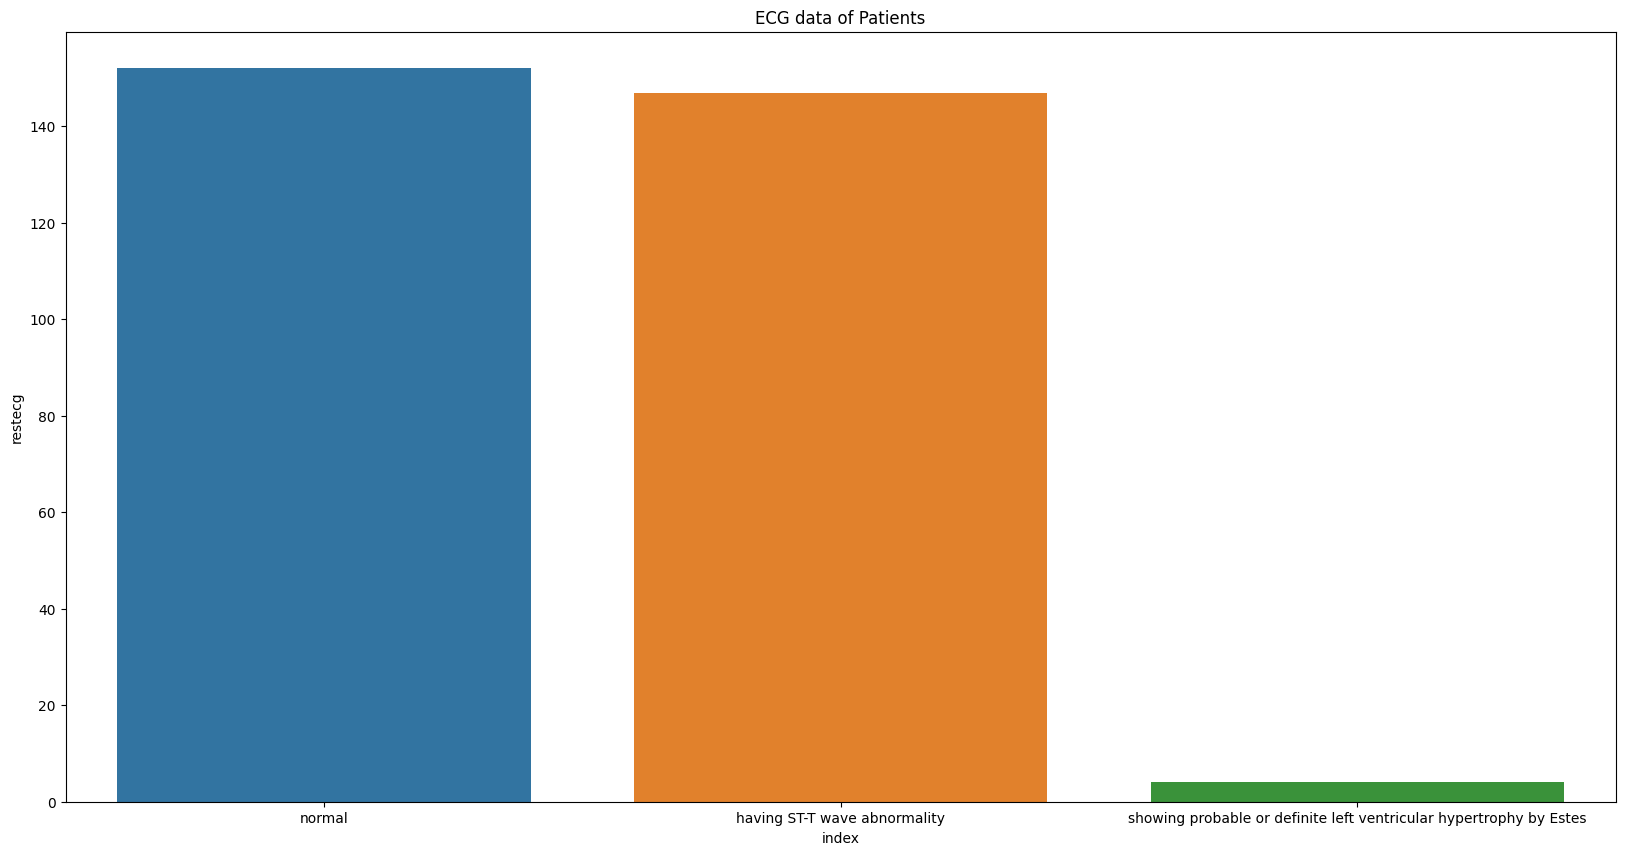

In [8]:
ecg_data= df['restecg'].value_counts().reset_index()
ecg_data['index'][0]= 'normal'
ecg_data['index'][1]= 'having ST-T wave abnormality'
ecg_data['index'][2]= 'showing probable or definite left ventricular hypertrophy by Estes'

plt.figure(figsize=(20, 10))
plt.title("ECG data of Patients")

sns.barplot(x=ecg_data['index'],y= ecg_data['restecg']);

#### Pairplot by all features
- Orange: 1 (more chance heart attack)
- Blue: 0 (less chance heart attack)

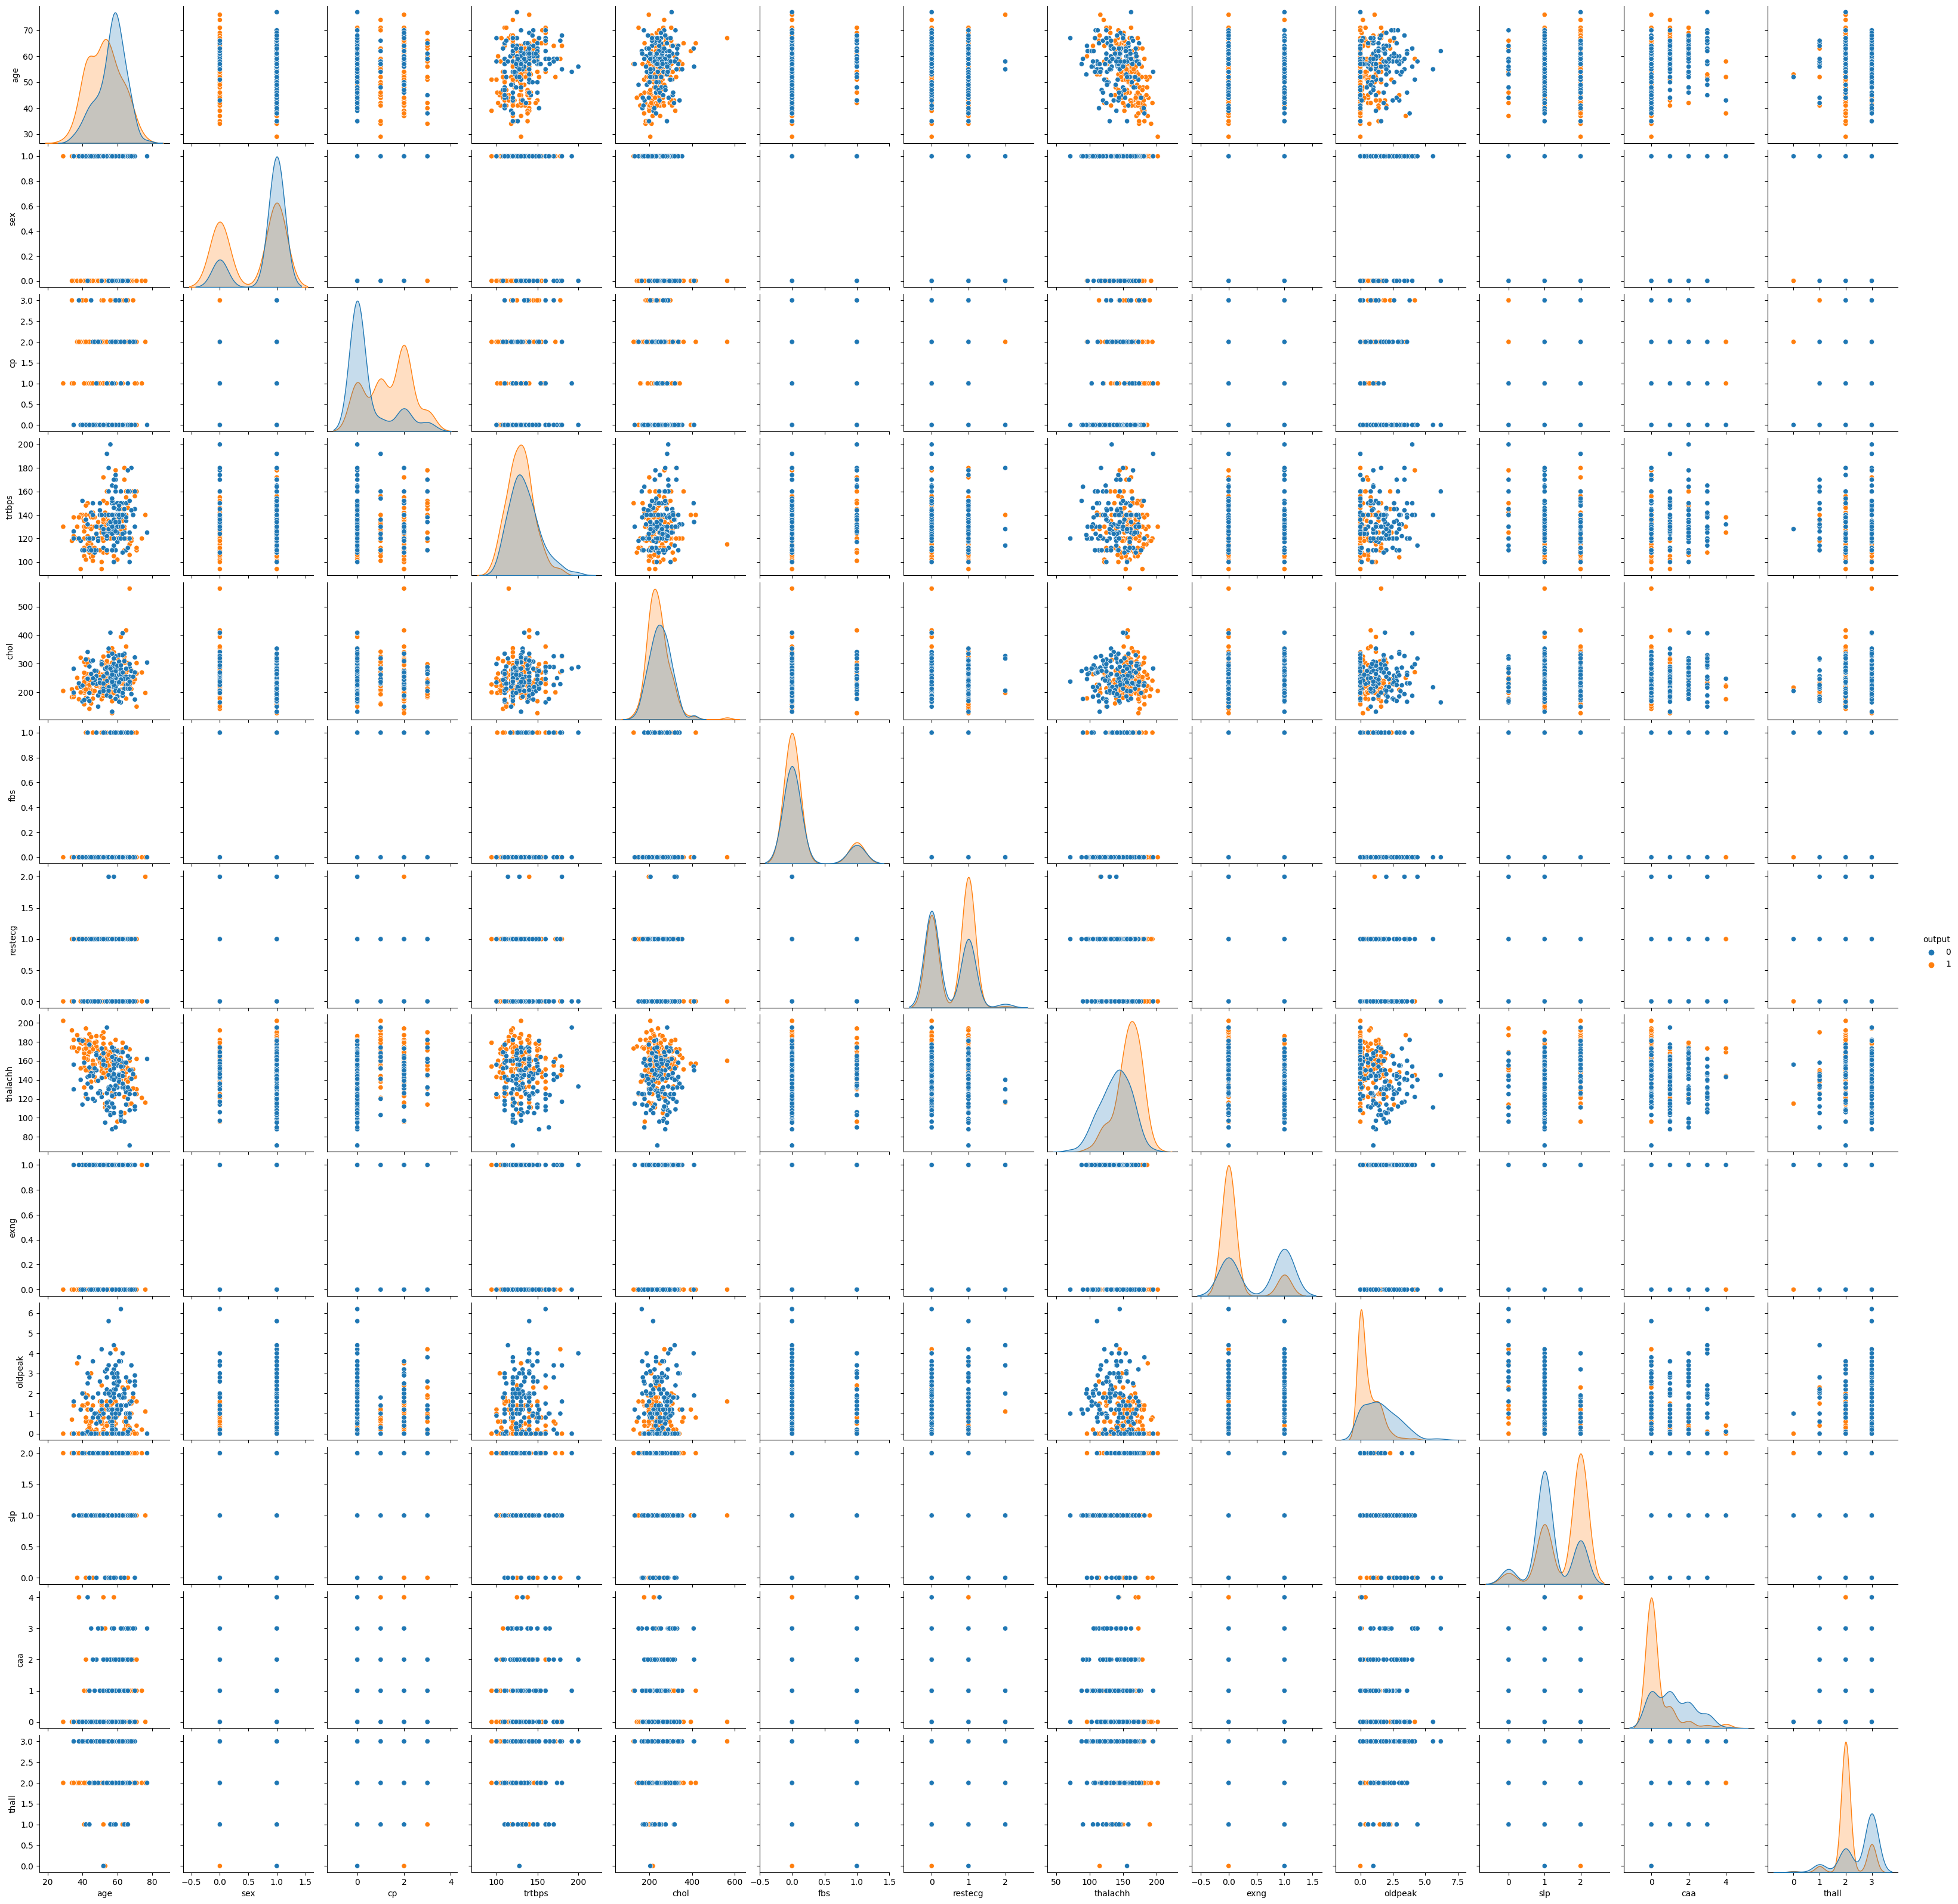

In [9]:
sns.pairplot(df,hue='output');

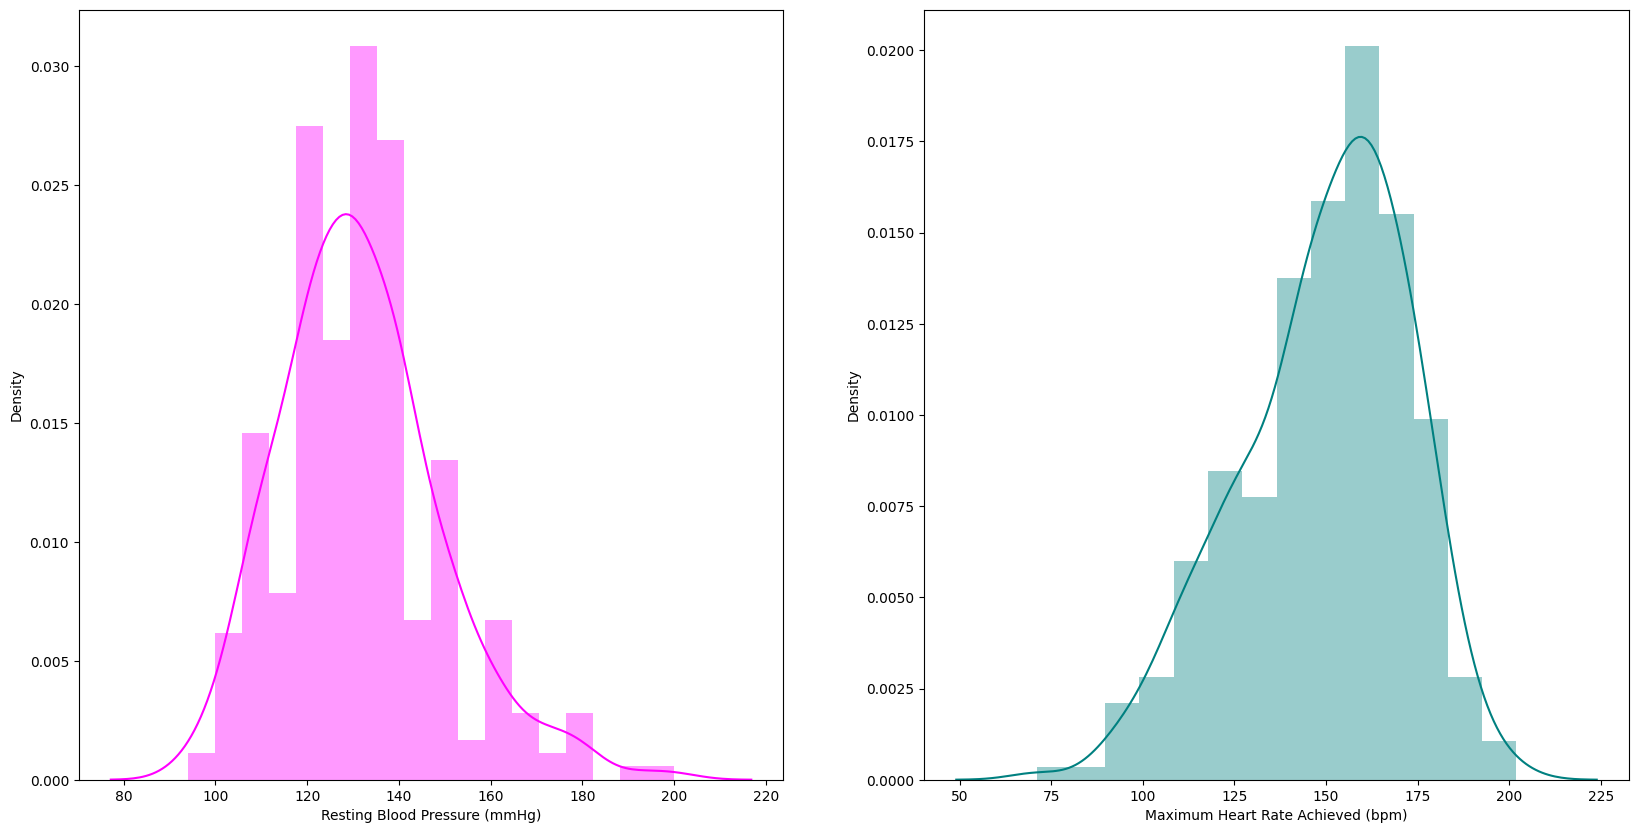

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'], kde=True, color = 'magenta')
plt.xlabel("Resting Blood Pressure (mmHg)")
plt.subplot(1,2,2)
sns.distplot(df['thalachh'], kde=True, color = 'teal')
plt.xlabel("Maximum Heart Rate Achieved (bpm)");

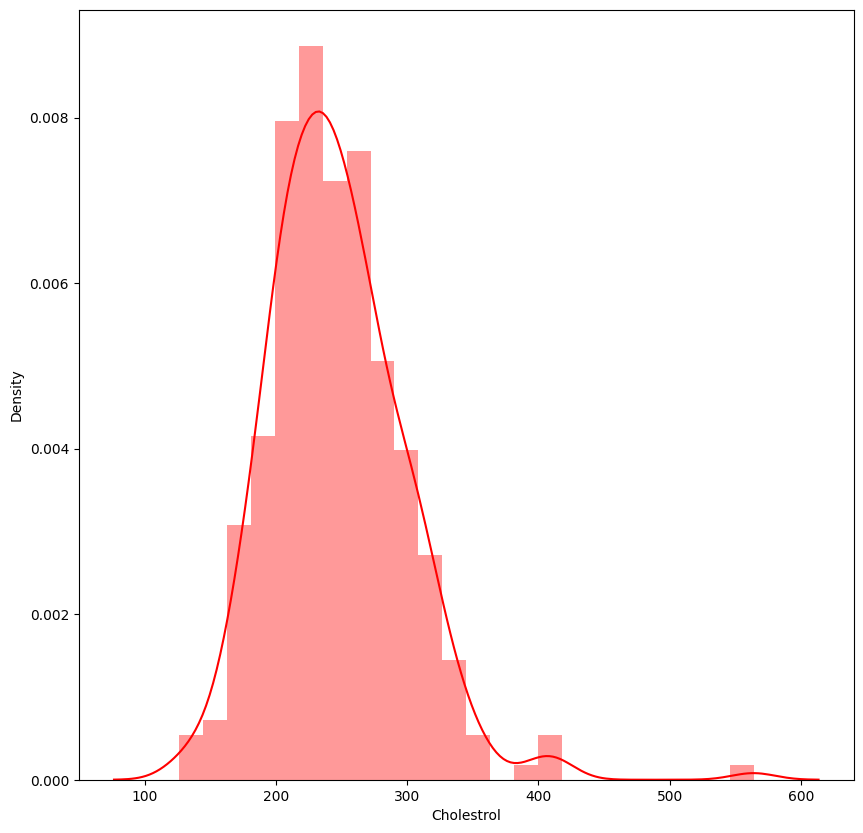

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], kde=True, color = 'red')
plt.xlabel("Cholestrol");

## Feature Engeneering
### Standartization

In [12]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(df)
df = scale.transform(df)
df = pd.DataFrame(df,columns=['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
                              'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'])

In [13]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


## Model Building
#### Now we can apply models to our data. We're going to use:
- Logistic regression
- Decicion Tree
- Random Forest
- K Nearest Neighbours
- SVM

#### Then we will use the ensembling techniques

In [14]:
# train / test split
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=55)

In [15]:
def cm_plot(conf_mat, title = ''):
    cm = pd.DataFrame(conf_mat, index = [i for i in ["Disease", 'No Disease']],
                    columns = [i for i in ["Disease", 'No Disease']])
    sns.heatmap(cm, annot=True)
    plt.xlabel('Model Prediction')
    plt.ylabel('Actual Result')
    plt.title(title);

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
encoded_y = lbl.fit_transform(y_train)
logreg = LogisticRegression()
logreg.fit(x_train, encoded_y)

LogisticRegression()

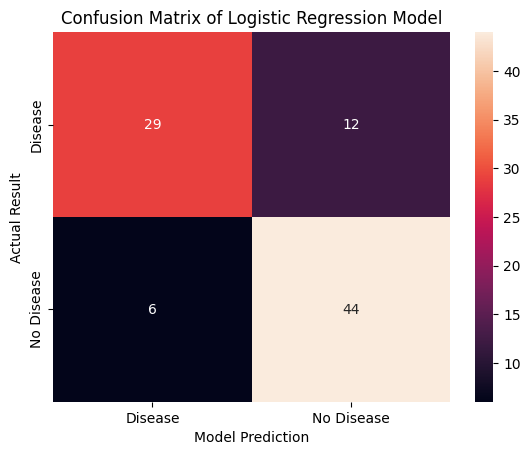

In [17]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve
from sklearn.metrics import confusion_matrix

encoded_ytest = lbl.fit_transform(y_test)
Y_pred1 = logreg.predict(x_test)
lr_conf_matrix = confusion_matrix(encoded_ytest,Y_pred1 )
lr_acc_score = accuracy_score(encoded_ytest, Y_pred1)

cm_plot(lr_conf_matrix, "Confusion Matrix of Logistic Regression Model")

In [103]:
print(f"Accuracy {round(lr_acc_score*100)}%")

Accuracy 80%


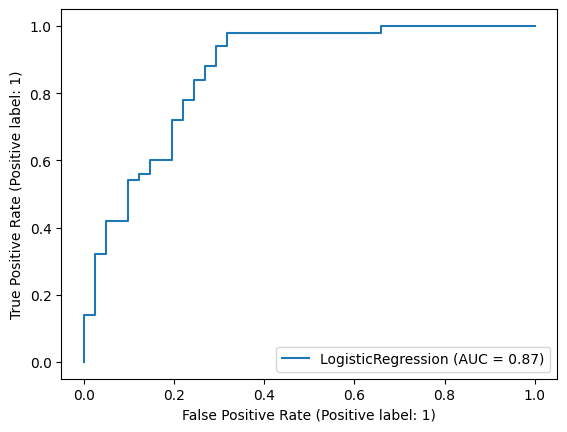

In [25]:
plot_roc_curve(logreg, x_test, encoded_ytest);

In [26]:
print(classification_report(encoded_ytest, Y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



### Decision Tree

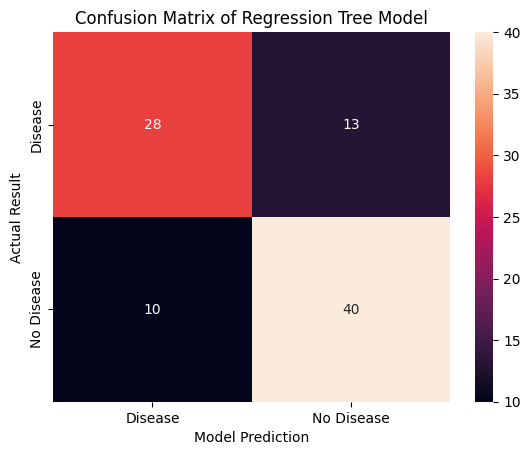

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,encoded_y)
ypred2=tree.predict(x_test)
encoded_ytest= lbl.fit_transform(y_test)

tree_conf_matrix = confusion_matrix(encoded_ytest,ypred2 )
tree_acc_score = accuracy_score(encoded_ytest, ypred2)

cm_plot(tree_conf_matrix, "Confusion Matrix of Regression Tree Model")

In [28]:
print(f"Accuracy {round(tree_acc_score*100)}%")

Accuracy 75%


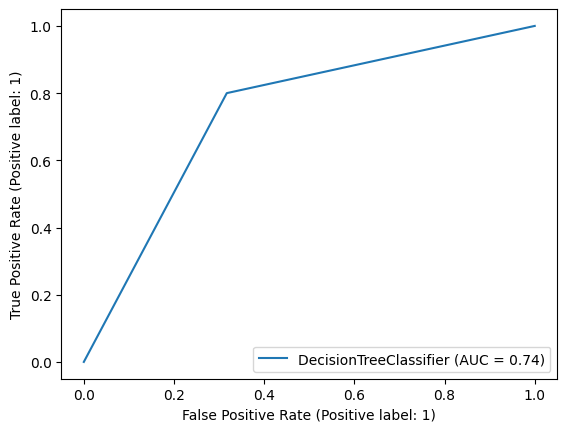

In [29]:
plot_roc_curve(tree, x_test, encoded_ytest);

In [30]:
print(classification_report(encoded_ytest, ypred2))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        41
           1       0.75      0.80      0.78        50

    accuracy                           0.75        91
   macro avg       0.75      0.74      0.74        91
weighted avg       0.75      0.75      0.75        91



### Random Forest

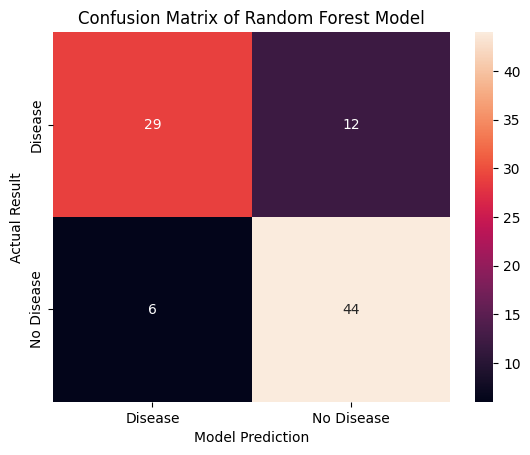

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,encoded_y)

ypred3 = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(encoded_ytest,ypred3 )
rf_acc_score = accuracy_score(encoded_ytest, ypred3)

cm_plot(rf_conf_matrix, "Confusion Matrix of Random Forest Model")

In [32]:
print(f"Accuracy {round(rf_acc_score*100)}%")

Accuracy 80%


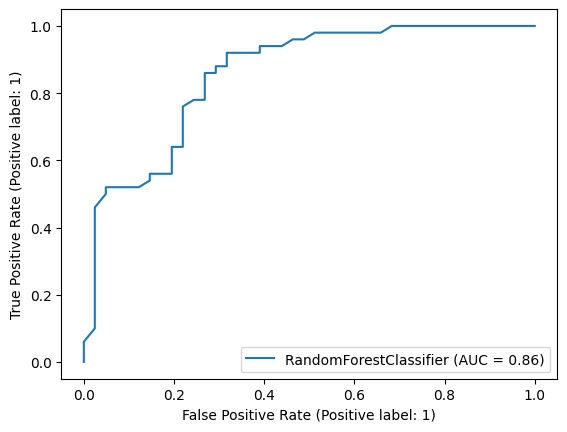

In [33]:
plot_roc_curve(rf, x_test, encoded_ytest);

In [34]:
print(classification_report(encoded_ytest, ypred3))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76        41
           1       0.79      0.88      0.83        50

    accuracy                           0.80        91
   macro avg       0.81      0.79      0.80        91
weighted avg       0.81      0.80      0.80        91



### K Nearest Neighbour

We have to select what k we will use for the maximum accuracy <br>
Let's write a function for it

In [35]:
from sklearn.neighbors import KNeighborsClassifier

error_rate= []
for i in range(1,40):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    pred= knn.predict(x_test)
    error_rate.append(np.mean(pred != encoded_ytest))

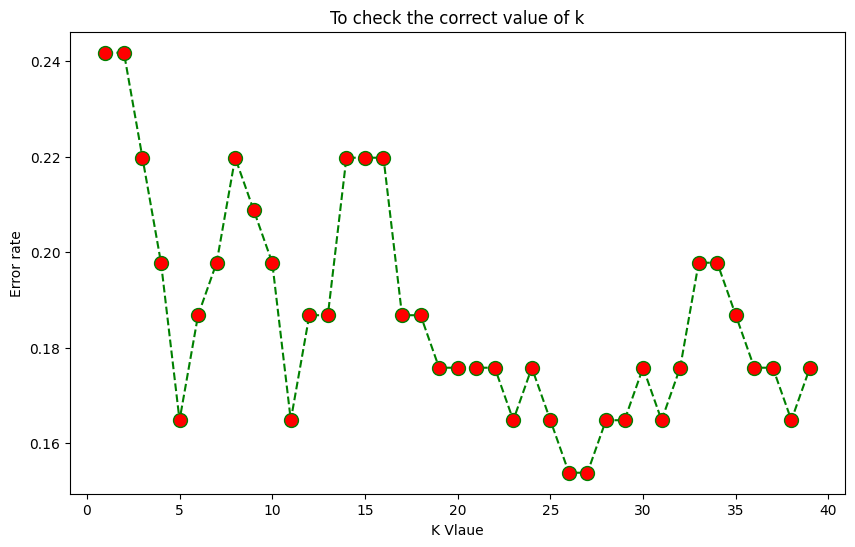

In [36]:
plt.figure(figsize=(10,6))

plt.plot(range(1,40),
         error_rate,color='green', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.xlabel('K Vlaue')
plt.ylabel('Error rate')
plt.title('To check the correct value of k')
plt.show()

Optimal K Value is 26

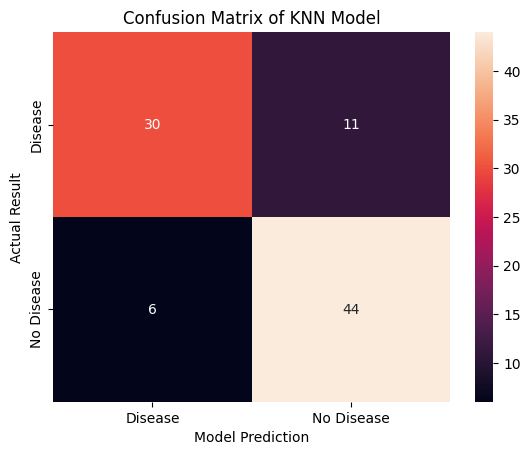

In [37]:
knn= KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,encoded_y)
ypred4= knn.predict(x_test)

knn_conf_matrix = confusion_matrix(encoded_ytest,ypred4 )
knn_acc_score = accuracy_score(encoded_ytest, ypred4)

cm_plot(knn_conf_matrix, "Confusion Matrix of KNN Model")

In [38]:
print(f"Accuracy {round(knn_acc_score*100)}%")

Accuracy 81%


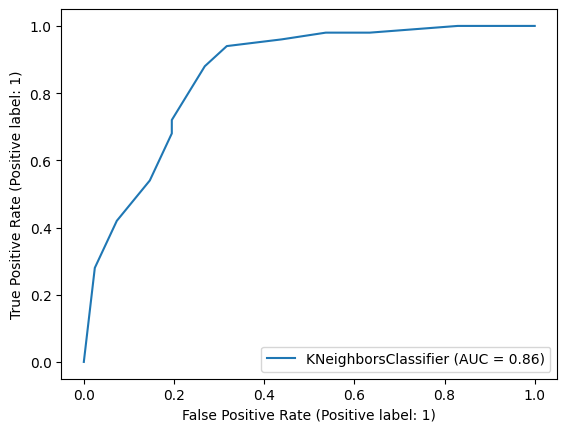

In [39]:
plot_roc_curve(knn, x_test, encoded_ytest);

In [40]:
print(classification_report(encoded_ytest, ypred4))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        41
           1       0.80      0.88      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



### Support Vector Machine (SVM)

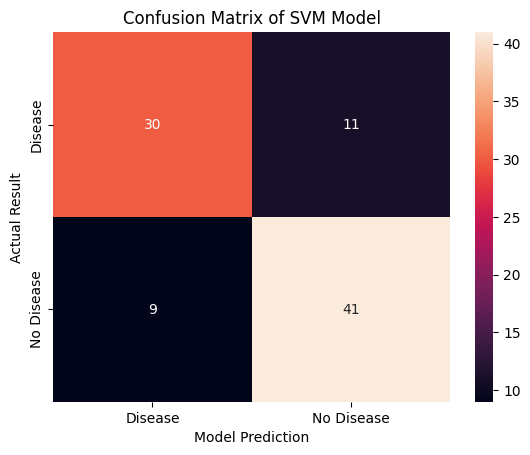

In [41]:
from sklearn import svm

svm = svm.SVC()
svm.fit(x_train, encoded_y)

ypred5 = svm.predict(x_test)
svm_conf_matrix = confusion_matrix(encoded_ytest,ypred5)
svm_acc_score = accuracy_score(encoded_ytest, ypred5)

cm_plot(svm_conf_matrix, "Confusion Matrix of SVM Model")

In [42]:
print(f"Accuracy {round(svm_acc_score*100)}%")

Accuracy 78%


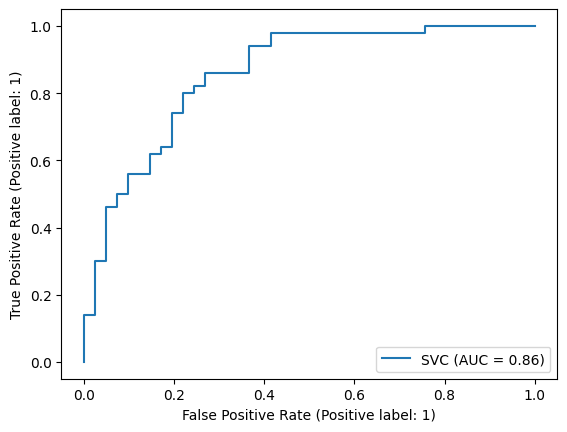

In [43]:
plot_roc_curve(svm, x_test, encoded_ytest);

In [44]:
print(classification_report(encoded_ytest, ypred5))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        41
           1       0.79      0.82      0.80        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



### Models result

In [45]:
model_acc= pd.DataFrame({'Model' : ['Logistic Regression','Decision Tree','Random Forest','K Nearest Neighbor','SVM'],
                        'Accuracy' : [lr_acc_score*100,tree_acc_score*100,rf_acc_score*100,knn_acc_score*100,svm_acc_score*100]})

model_acc = model_acc.sort_values(by=['Accuracy'],ascending=False)
model_acc

,Model,Accuracy
3,K Nearest Neighbor,81.318681
0,Logistic Regression,80.219780
2,Random Forest,80.219780
4,SVM,78.021978
1,Decision Tree,74.725275


#### Let us use one more Technique known as Adaboost, this is a Boosting technique which uses multiple models for better accuracy.

### Adaboost  Classifier
Let us first use some random parameters for training the model without Hypertuning.

In [46]:
from sklearn.ensemble import AdaBoostClassifier

adab = AdaBoostClassifier(base_estimator=svm,
                            n_estimators=100,
                            algorithm='SAMME',
                            learning_rate=0.01,
                            random_state=0)

adab.fit(x_train, encoded_y)

AdaBoostClassifier(algorithm='SAMME', base_estimator=SVC(), learning_rate=0.01,
                   n_estimators=100, random_state=0)

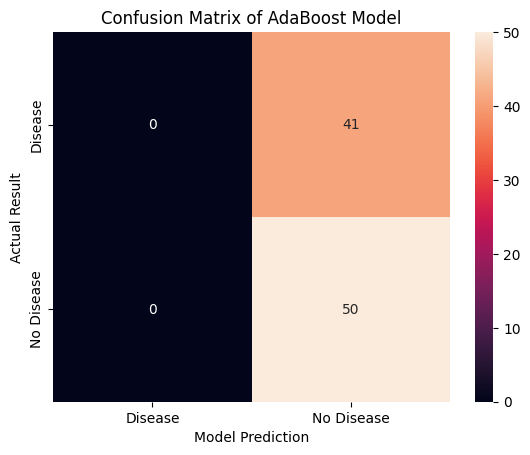

In [47]:
ypred6=adab.predict(x_test)

adab_conf_matrix = confusion_matrix(encoded_ytest,ypred6)
adab_acc_score = accuracy_score(encoded_ytest, ypred6)

cm_plot(adab_conf_matrix, "Confusion Matrix of AdaBoost Model")

Terrible model

### Grid Search CV
For top 3 performing Algorithms

In [48]:
from sklearn.model_selection import GridSearchCV

model_acc

,Model,Accuracy
3,K Nearest Neighbor,81.318681
0,Logistic Regression,80.219780
2,Random Forest,80.219780
4,SVM,78.021978
1,Decision Tree,74.725275


### KNN GridSearch

In [49]:
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

grid = dict(n_neighbors=n_neighbors,
            weights=weights,
            metric=metric)

In [50]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=KNeighborsClassifier(n_neighbors=12),
             n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

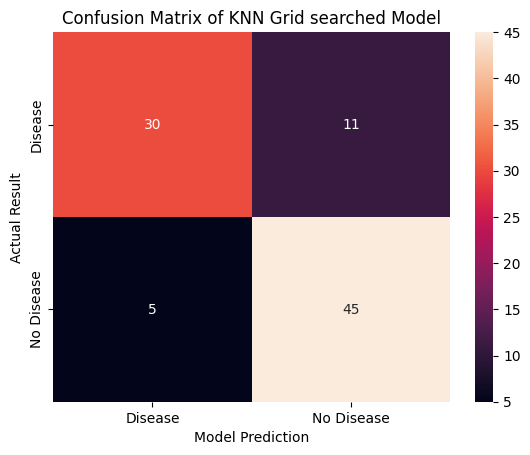

In [52]:
knn= KNeighborsClassifier(n_neighbors=17,
                          metric='manhattan',
                          weights='distance')
                          
knn.fit(x_train,encoded_y)
knn_pred= knn.predict(x_test)

knn_pred_conf_matrix = confusion_matrix(encoded_ytest,knn_pred)
knn_pred_acc_score = accuracy_score(encoded_ytest, knn_pred)

cm_plot(knn_pred_conf_matrix, "Confusion Matrix of KNN Grid searched Model")

In [53]:
print(f"Accuracy {round(knn_pred_acc_score*100)}%")

Accuracy 82%


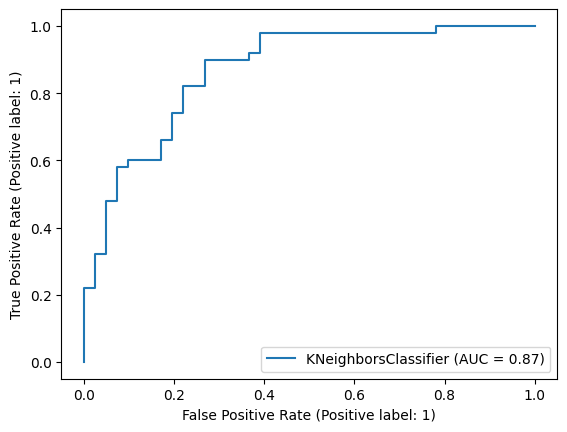

In [54]:
plot_roc_curve(knn, x_test, encoded_ytest);

In [55]:
print(classification_report(encoded_ytest, knn_pred))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        41
           1       0.80      0.90      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



### LogReg GridSearch

In [56]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [100, 10, 1.0, 0.1, 0.01]   
}

grid1= GridSearchCV(LogisticRegression(),param_grid)
grid1.fit(x_train,encoded_y)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [57]:
grid1.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}

#### Applying params to model

In [58]:
logreg1 = LogisticRegression(C=1.0,
                             penalty='l1',
                             solver='saga')
                    
logreg1.fit(x_train,encoded_y)

LogisticRegression(penalty='l1', solver='saga')

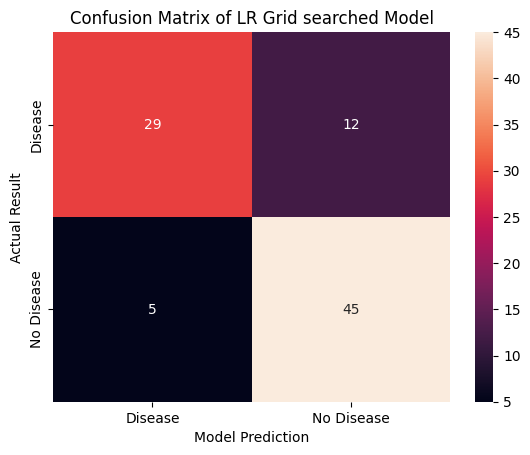

In [59]:
logreg_pred = logreg1.predict(x_test)
logreg_pred_conf_matrix = confusion_matrix(encoded_ytest,logreg_pred)
logreg_pred_acc_score = accuracy_score(encoded_ytest, logreg_pred)

cm_plot(logreg_pred_conf_matrix, "Confusion Matrix of LR Grid searched Model")

In [60]:
print(f"Accuracy {round(logreg_pred_acc_score*100)}%")

Accuracy 81%


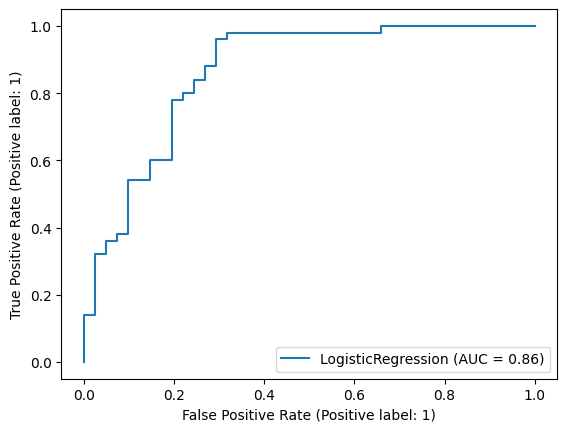

In [61]:
plot_roc_curve(logreg1, x_test, encoded_ytest);

In [62]:
print(classification_report(encoded_ytest, logreg_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



### SVM GridSearch

In [63]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,
            C=C,
            gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, 
                             n_repeats=3, 
                             random_state=1)
                            
grid_search = GridSearchCV(estimator=svm, 
                           param_grid=grid, 
                           n_jobs=-1, 
                           cv=cv, 
                           scoring='accuracy',
                           error_score=0)

grid_search.fit(x_train,encoded_y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [64]:
grid_search.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

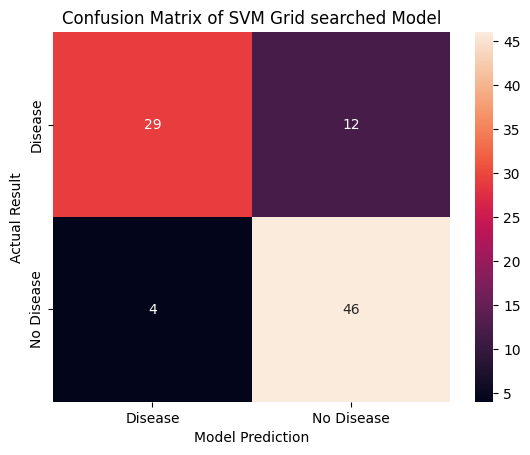

In [65]:
from sklearn.svm import SVC

svc= SVC(C= 0.1, 
         gamma= 'scale',
         kernel= 'rbf')

svc.fit(x_train,encoded_y)
svm_pred= svc.predict(x_test)

svm_pred_conf_matrix = confusion_matrix(encoded_ytest,svm_pred)
svm_pred_acc_score = accuracy_score(encoded_ytest, svm_pred)

cm_plot(svm_pred_conf_matrix, "Confusion Matrix of SVM Grid searched Model")

In [66]:
print(f"Accuracy {round(svm_pred_acc_score*100)}%")

Accuracy 82%


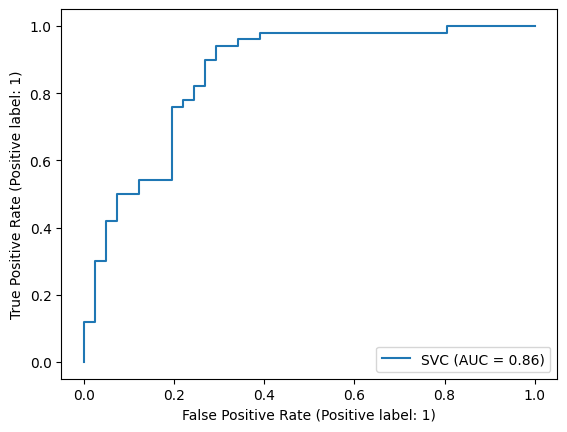

In [67]:
plot_roc_curve(svc, x_test, encoded_ytest);

In [68]:
print(classification_report(encoded_ytest, svm_pred))

              precision    recall  f1-score   support

           0       0.88      0.71      0.78        41
           1       0.79      0.92      0.85        50

    accuracy                           0.82        91
   macro avg       0.84      0.81      0.82        91
weighted avg       0.83      0.82      0.82        91



## Final Verdict

**Every life matters!** So if we make a False Negative mistake it will cost us much more! We need to chose model with best True Positive results. And it's a:
- KNN Models
- SVM models

**Let's compare our models to Auto ML tool**

## Auto ML 

EvalML is an open-source AutoML library written in python that automates a large part of the machine learning process and we can easily evaluate which machine learning pipeline works better for the given set of data.

In [69]:
import evalml

In [70]:
df = pd.read_csv("heart.csv")
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
y = lbl.fit_transform(y)

- Eval ML Library will do all the pre processing techniques for us and split the data for us
- There are different problem type parameters in Eval ML, we have a Binary type problem here, that's why we are using Binary as a input

In [71]:
#train/test split
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='binary')

#all types of problems
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

**Running the Auto ML to select best Algorithm**

In [72]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

	High coefficient of variation (cv >= 0.5) within cross validation scores.
	Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer may not perform as estimated on unseen data.


{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:01',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:02'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Classifier Select From Model': '00:01',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + RF Classifier Select From Model': '00:01',
  'Total time of batch': '00:03'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'E

In [73]:
automl.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.413358,0.413358,0.029595,97.366943,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.420733,0.420733,0.032101,97.319964,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.462099,0.462099,0.066745,97.056469,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.466918,0.466918,0.024541,97.025773,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.470037,0.470037,0.075389,97.005905,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.488356,0.488356,0.042491,96.889214,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,1,Logistic Regression Classifier w/ Label Encode...,1,0.489726,0.489726,0.058300,96.880485,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,3,Logistic Regression Classifier w/ Label Encode...,3,0.526695,0.526695,0.022981,96.644997,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.638074,0.638074,0.006335,95.935522,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,5,Decision Tree Classifier w/ Label Encoder + Re...,5,6.429347,6.429347,2.401983,59.045611,True,"{'Label Encoder': {'positive_label': None}, 'I..."


In [74]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': '

In [75]:
best_pipeline=automl.best_pipeline

In [76]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


***********************************************************************************************************************
* Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *
***********************************************************************************************************************

Problem Type: binary
Model Family: Extra Trees

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Select Columns Transformer
	 * columns : ['age', 'cp', 'thalachh', 'exng', 'oldpeak', 'caa', 'thall']
5. Extra Trees Classifier
	 * n_estimators : 100
	 * max_features : auto
	 * max_depth : 6
	 * min_samples_split : 2
	 * min_weight_fraction_leaf : 0.0
	 * n

In [77]:
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.8701298701298702),
             ('F1', 0.7812499999999999),
             ('Precision', 0.8064516129032258),
             ('Recall', 0.7575757575757576)])

Now if we want to build our Model for a specific objective we can do that 

In [78]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:01',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:02'}}

In [79]:
automl_auc.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.891494,0.891494,0.023837,39.149377,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,1,Logistic Regression Classifier w/ Label Encode...,1,0.857750,0.857750,0.029353,35.774980,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [80]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


********************************************************************************************
* Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer *
********************************************************************************************

Problem Type: binary
Model Family: Random Forest

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Replace Nullable Types Transformer
3. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * boolean_impute_strategy : most_frequent
	 * categorical_fill_value : None
	 * numeric_fill_value : None
	 * boolean_fill_value : None
4. Random Forest Classifier
	 * n_estimators : 100
	 * max_depth : 6
	 * n_jobs : -1

Training
Training for binary problems.
Total training time (including CV): 1.4 seconds

Cross Validation
----------------
              AUC    F1  Precision # Training # Validation
0           0.911 0.833      0.857        161           81
1           0.8

In [81]:
best_pipeline_auc = automl_auc.best_pipeline

In [82]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.9123376623376623)])

**We got an 91.2 % AUC Score which is the highest of all**

In [83]:
best_pipeline.save("model.pkl")

In [84]:
final_model=automl.load('model.pkl')
final_model.predict_proba(X_test)

,0,1
24,0.476206,0.523794
67,0.111968,0.888032
13,0.292056,0.707944
112,0.384836,0.615164
80,0.045754,0.954246
...,...,...
160,0.131567,0.868433
234,0.596474,0.403526
110,0.655146,0.344854
190,0.892123,0.107877
